<a href="https://colab.research.google.com/github/Yash1329/ML_Projets/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Hand Written Digit Prediction

In [9]:
# Import Library
import pandas as pd

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [3]:
# Import Data
from sklearn.datasets import load_digits

In [13]:
df = load_digits()

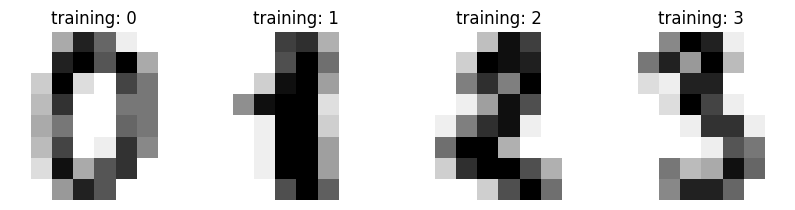

In [15]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("training: %i" % label)

In [17]:
df.images.shape

(1797, 8, 8)

In [19]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [20]:
df.images[0].shape

(8, 8)

In [21]:
len(df.images)

1797

In [22]:
n_sample = len(df.images)
data = df.images.reshape((n_sample, -1))

In [23]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
data[0].shape

(64,)

In [25]:
data.shape

(1797, 64)

In [26]:
# Scaling Image Data
data.min()

0.0

In [27]:
data.max()

16.0

In [28]:
data = data/16

In [29]:
data.min()

0.0

In [30]:
data.max()

1.0

In [31]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [32]:
# Train Test Split Data
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [35]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(x_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

In [38]:
# Predict Test Data
y_pred = rf.predict(x_test)

In [39]:
y_pred

array([1, 5, 1, 5, 0, 4, 0, 6, 7, 3, 4, 6, 6, 7, 8, 0, 6, 2, 6, 2, 3, 5,
       5, 6, 5, 0, 7, 3, 7, 7, 2, 8, 2, 5, 4, 9, 0, 8, 2, 1, 8, 8, 5, 9,
       4, 6, 5, 1, 4, 1, 6, 4, 4, 5, 9, 8, 6, 0, 3, 4, 4, 8, 4, 1, 6, 0,
       0, 9, 1, 2, 0, 4, 5, 6, 8, 8, 1, 4, 8, 8, 0, 4, 3, 8, 1, 7, 6, 3,
       5, 1, 7, 8, 9, 0, 4, 1, 3, 1, 4, 6, 3, 0, 8, 1, 2, 0, 2, 8, 8, 4,
       8, 1, 5, 1, 1, 2, 1, 9, 1, 1, 0, 5, 9, 6, 2, 6, 2, 3, 5, 4, 2, 3,
       6, 0, 3, 9, 5, 5, 0, 5, 7, 5, 6, 6, 9, 1, 4, 8, 2, 1, 1, 1, 2, 0,
       1, 2, 1, 0, 1, 5, 7, 9, 3, 1, 3, 6, 2, 3, 1, 4, 2, 8, 5, 2, 1, 7,
       6, 1, 3, 1, 4, 3, 2, 4, 3, 3, 4, 8, 9, 7, 4, 0, 1, 9, 0, 7, 4, 1,
       8, 6, 0, 3, 4, 3, 9, 8, 3, 1, 9, 2, 8, 6, 2, 7, 9, 4, 1, 0, 1, 7,
       1, 1, 2, 2, 1, 4, 7, 8, 6, 3, 2, 4, 7, 3, 0, 9, 0, 5, 7, 8, 3, 6,
       4, 1, 2, 0, 0, 2, 8, 6, 1, 0, 7, 4, 8, 1, 0, 5, 6, 0, 5, 2, 7, 5,
       6, 2, 7, 6, 3, 9, 5, 9, 3, 1, 0, 7, 7, 5, 9, 9, 3, 7, 7, 3, 8, 7,
       0, 0, 3, 5, 8, 9, 6, 3, 4, 2, 8, 7, 9, 4, 5,

In [40]:
# Model Accuracy
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  3],
       [ 2,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 51]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.95      1.00      0.98        60
           2       1.00      1.00      1.00        44
           3       1.00      0.97      0.98        59
           4       0.98      1.00      0.99        58
           5       0.96      0.94      0.95        52
           6       1.00      0.96      0.98        55
           7       0.98      0.98      0.98        54
           8       0.92      0.92      0.92        48
           9       0.94      0.94      0.94        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

